In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


Step 1: Find optic Disc

In [34]:
#find_optic_disc by finding the brightest region in the image

def find_optic_disc(imgpath, radius=15):
    image=cv2.imread(imgpath)
    img1=image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (radius, radius), 0)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
    cv2.rectangle(image, (maxLoc[0]-radius,maxLoc[1]-radius),(maxLoc[0]+radius,maxLoc[1]+radius), (255, 0, 0), 2)
    return image

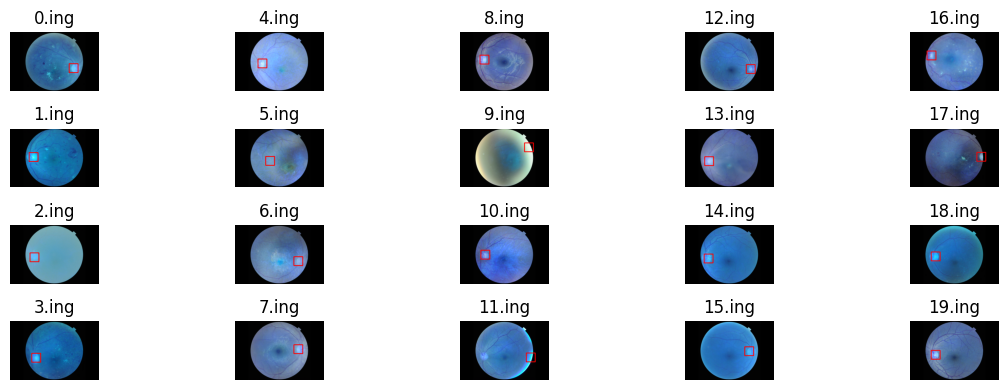

In [35]:
imgtest=[]
for i in range(2,22):
    imgtest.append("Locating\\"+str(i)+".png")
fig,axes = plt.subplots(4,int(len(imgtest)/4),figsize=(12,4))
for i in range(len(imgtest)):
    axes[i%4,i//4].axis("off")
    axes[i%4,i//4].imshow(find_optic_disc(imgtest[i]))
    axes[i%4,i//4].set_title(f"{i}.ing")
plt.axis("off")
plt.tight_layout()
plt.show()

Step 2: Find vessels
###### from https://blog.csdn.net/qq_40511157/article/details/102770108

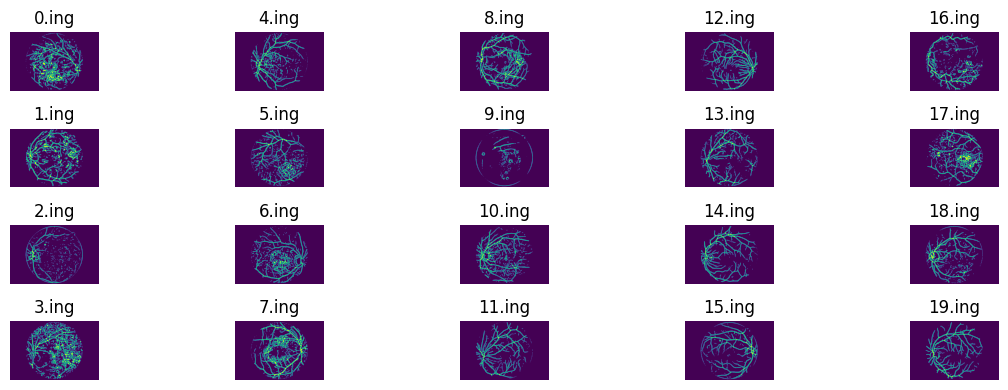

In [41]:
import VesselExtraction as VE
imgtest=[]
for i in range(2,22):
    imgtest.append("Locating_Origin\\"+str(i)+".png")
fig,axes = plt.subplots(4,int(len(imgtest)/4),figsize=(12,4))
for i in range(len(imgtest)):
    axes[i%4,i//4].axis("off")
    axes[i%4,i//4].imshow(VE.VesselExtract(imgtest[i]))
    axes[i%4,i//4].set_title(f"{i}.ing")
plt.axis("off")
plt.tight_layout()
plt.show()

Step 3: macula extraction

In [52]:
def find_macula(imgpath, radius=15):
    image=cv2.imread(imgpath)
    im1=image.copy()
    lower_black = np.array([0, 0, 0], dtype=np.uint8)
    upper_black = np.array([10, 10, 10], dtype=np.uint8)
    black_mask = cv2.inRange(image, lower_black, upper_black)
    replace_color = (0, 255, 0)  
    image[black_mask > 0] = replace_color
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (radius, radius), 0)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
    cv2.rectangle(im1, (minLoc[0]-radius,minLoc[1]-radius),(minLoc[0]+radius,minLoc[1]+radius), (255, 0, 0), 2)
    return im1


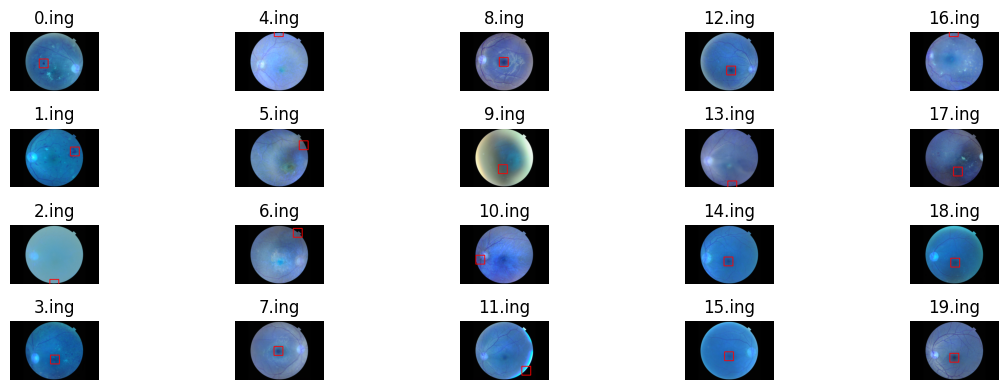

In [53]:
imgtest=[]
for i in range(2,22):
    imgtest.append("Locating\\"+str(i)+".png")
fig,axes = plt.subplots(4,int(len(imgtest)/4),figsize=(12,4))
for i in range(len(imgtest)):
    axes[i%4,i//4].axis("off")
    axes[i%4,i//4].imshow(find_macula(imgtest[i]))
    axes[i%4,i//4].set_title(f"{i}.ing")
plt.axis("off")
plt.tight_layout()
plt.show()